## Titanic Survival Prediction using FIND S Algorithm

In [76]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset using read_csv
titanic = pd.read_csv("../data/train.csv")

In [4]:
# Printing first 5 instances of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Printing last 5 instances of the dataset
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Chceking for null values or unclean instances among the dataset
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Since we observe null values, we fill first clean our dataset. This is very important step since it allows us to perform analytics on dataset after cleaning it.

# For all null values in age column, we replace them with the mean
age = titanic['Age'].fillna(titanic['Age'].mean())
titanic["Age"] = age

# For all null values in cabin and embarked column, we replace them with the mode
cabin = titanic['Cabin'].fillna(titanic['Cabin'].mode()[0])
titanic["Cabin"] = cabin
embarked = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
titanic["Embarked"] = embarked

# We can ignore all the Ticket values since they are unique for each passenger
titanic = titanic.drop(['Ticket'], axis=1)


In [13]:
# Confirming that dataset has no Null values
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [22]:
# Our concept it the people who survived the titanic disaster
# Our initial hypotheses is the most specific one
# Concept Learning in Machine Learning can be thought of as a boolean-valued function defined over a large set of training data. 

# We drop Survived column because that is our concept
Survived = titanic["Survived"]
titanic = titanic.drop(["Survived"], axis = 1)

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    object 
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [60]:
# Initializing our hypothesis
hypothesis = [None] * (titanic.shape[1])
print(hypothesis)

[None, None, None, None, None, None, None, None, None, None]


In [61]:
# Iterating through the dataset and modifying hypothesis accordingly.
# Since our hypothesis deals with only positives i.e. people who survived, we skip the rows where survived is 0.
for index, row in titanic.iterrows():

    if (Survived[index] == 0):
        continue
    else:
        for i in range(0, len(hypothesis)):
            if (hypothesis[i] == None):
                hypothesis[i] = row[i]
            else:
                if (hypothesis[i]!= row[i]):
                    hypothesis[i] = '?'


In [62]:
# Hence, we obtain most generalized hypothesis
print(hypothesis)

['?', '?', '?', '?', '?', '?', '?', '?', '?', '?']


In [68]:
# Just for evaluation purpose, we will now use only the first few rows of data
hypothesis = [None] * (titanic.shape[1])
print(hypothesis)

[None, None, None, None, None, None, None, None, None, None]


In [69]:
# Considering only first 15 rows, we print our hypothesis 

for index, row in titanic.iterrows():

    if (index > 15):
        break

    if (Survived[index] == 0):
        continue
    else:
        for i in range(0, len(hypothesis)):
            if (hypothesis[i] == None):
                hypothesis[i] = row[i]
            else:
                if (hypothesis[i]!= row[i]):
                    hypothesis[i] = '?'

print(hypothesis)

['?', '?', '?', 'female', '?', '?', '?', '?', '?', '?']


In [70]:
# Thus the new hypothesis concludes that the person will survive provided the gender is female (based on first 15 rows only).
print(hypothesis)

['?', '?', '?', 'female', '?', '?', '?', '?', '?', '?']


In [71]:
# Calculate the correlation matrix
correlation_matrix = titanic.corr()

# Print the correlation matrix to review the corelations
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.035144  0.033207 -0.057527 -0.001652  0.012658
Pclass         -0.035144  1.000000 -0.331339  0.083081  0.018443 -0.549500
Age             0.033207 -0.331339  1.000000 -0.232625 -0.179191  0.091566
SibSp          -0.057527  0.083081 -0.232625  1.000000  0.414838  0.159651
Parch          -0.001652  0.018443 -0.179191  0.414838  1.000000  0.216225
Fare            0.012658 -0.549500  0.091566  0.159651  0.216225  1.000000


C:\Users\pritp\AppData\Local\Temp\ipykernel_15332\4237957461.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic.corr()


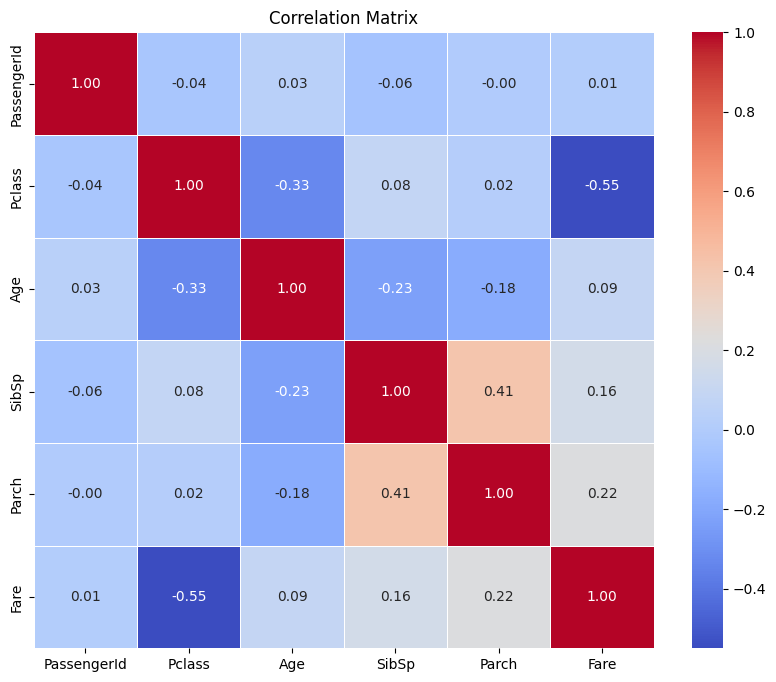

In [77]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()